In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv("/Users/sammy/Desktop/Ironhack/Week10/we_fn_use_c_marketing_customer_value_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 1.Get the numerical variables from our dataset.


In [3]:
numerical = df.select_dtypes(include=np.number)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# 2-Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


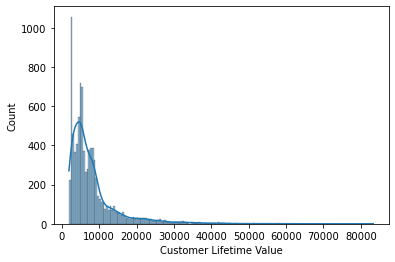

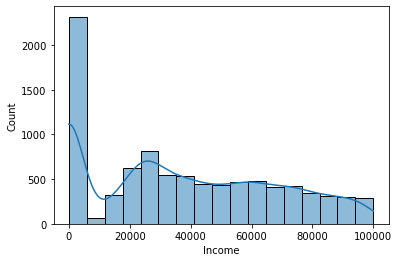

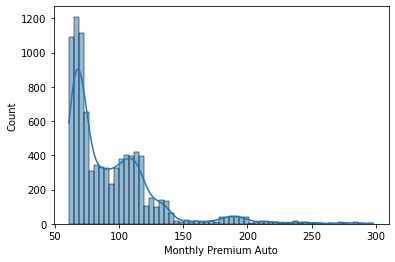

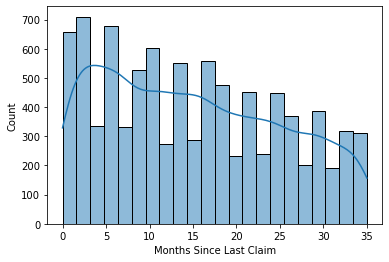

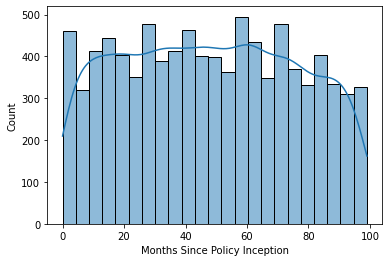

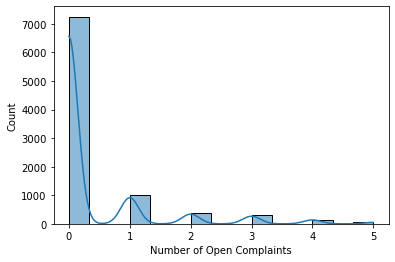

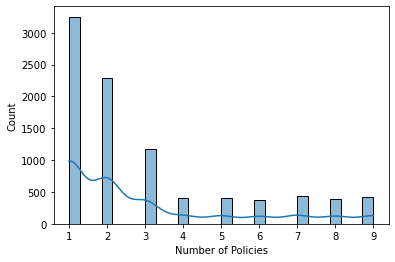

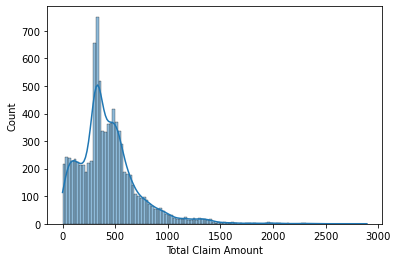

In [4]:
for col in numerical:
    sns.histplot(numerical[col], kde = True)
    plt.show()

# 3-Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


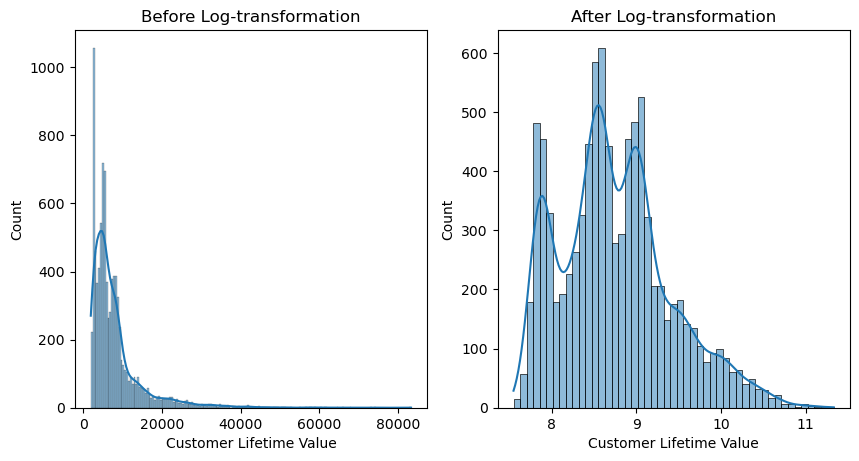

In [5]:
# Log Transformation on Customer
customer_log = np.log(numerical['Customer Lifetime Value'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Customer Lifetime Value'], kde=True, ax=ax[0])
sns.histplot(x=customer_log, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()


/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


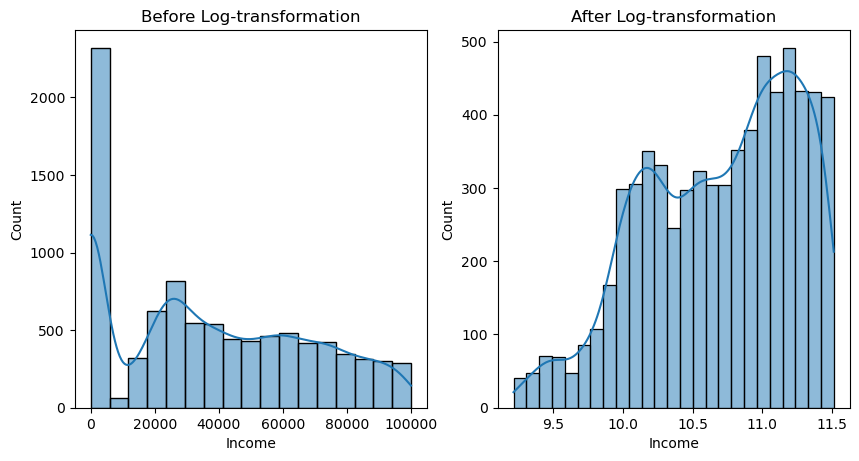

In [6]:
# Log Transformation on Income
income_log=np.log(numerical['Income'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Income'], kde=True, ax=ax[0])
sns.histplot(x=income_log, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()

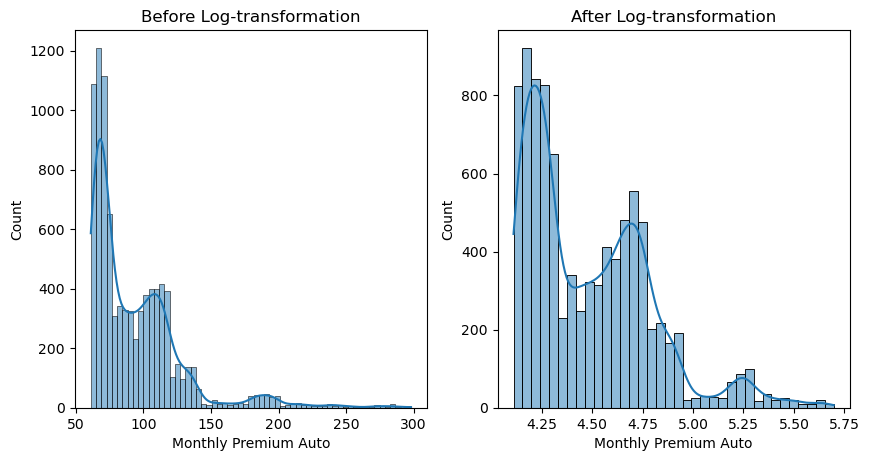

In [7]:
# Log Transformation on Monthly Premium Auto
month_premium_auto_log=np.log(numerical['Monthly Premium Auto'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Monthly Premium Auto'], kde=True, ax=ax[0])
sns.histplot(x=month_premium_auto_log, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()


/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


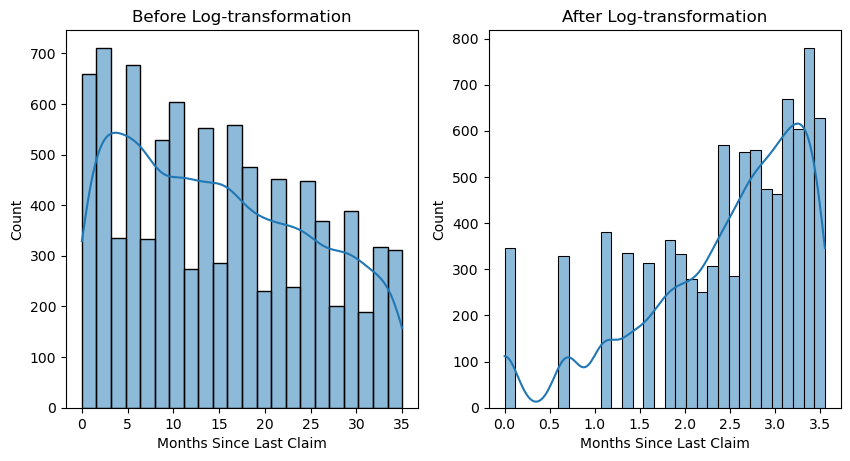

In [8]:
# Log Transformation on Months Since Last Claim
monthclaim_log=np.log(numerical['Months Since Last Claim'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Months Since Last Claim'], kde=True, ax=ax[0])
sns.histplot(x=monthclaim_log, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()



/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


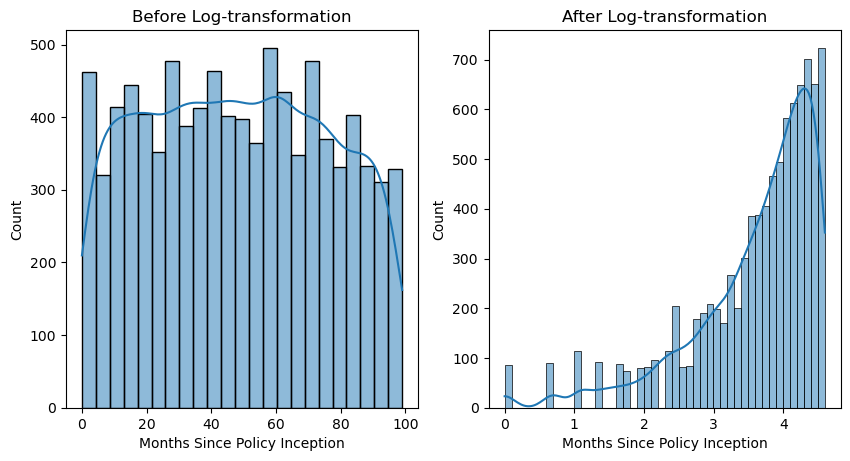

In [9]:
# Log Transformation on Months Since Policy Inception
month_policy_inception_log=np.log(numerical['Months Since Policy Inception'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Months Since Policy Inception'], kde=True, ax=ax[0])
sns.histplot(x=month_policy_inception_log, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


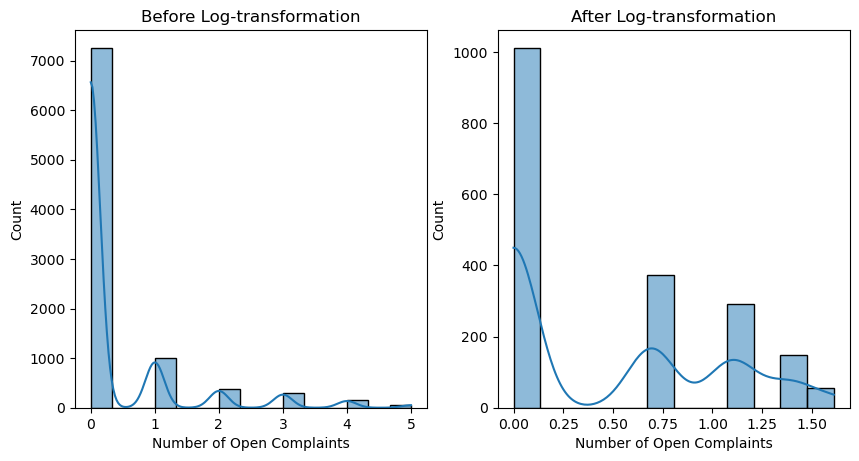

In [10]:
# Log Transformation on Number of Open Complaints
opencomplaints_log=np.log(numerical['Number of Open Complaints'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Number of Open Complaints'], kde=True, ax=ax[0])
sns.histplot(x=opencomplaints_log, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()

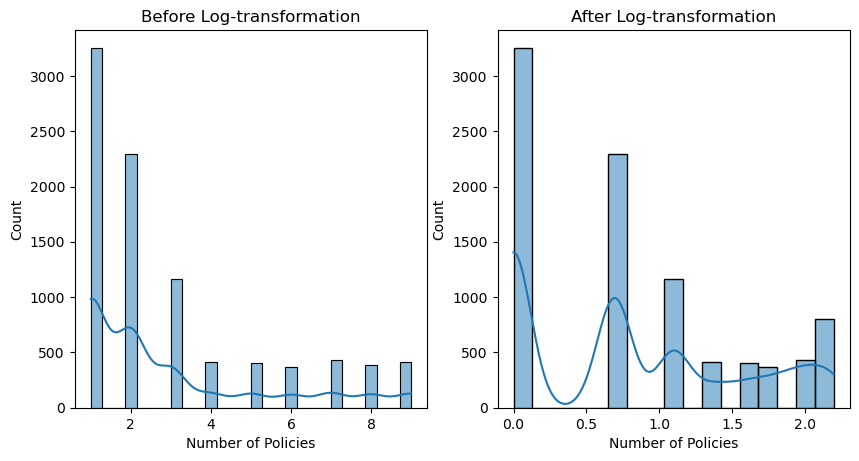

In [11]:
# Log Transformation on Number of Policies
number_policies=np.log(numerical['Number of Policies'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Number of Policies'], kde=True, ax=ax[0])
sns.histplot(x=number_policies, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()

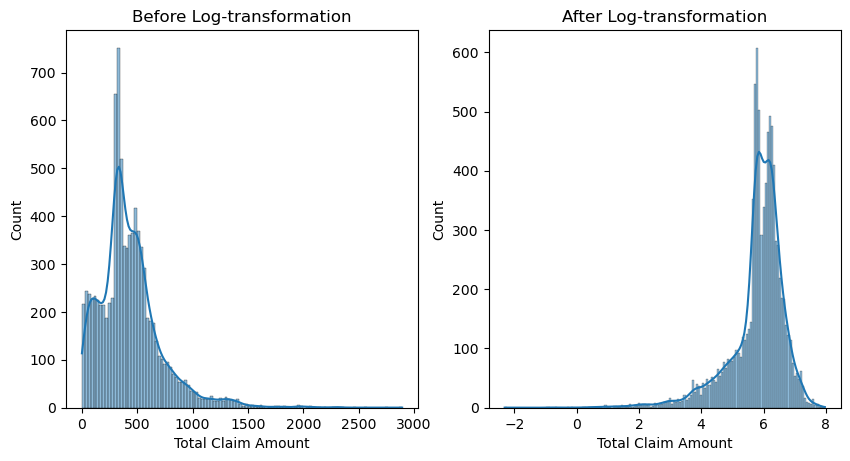

In [12]:
# Log Transformation on Total Claim Amount
total_claim_amount_log=np.log(numerical['Total Claim Amount'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Total Claim Amount'], kde=True, ax=ax[0])
sns.histplot(x=total_claim_amount_log, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()

·With the log-transformation we convert them in a Normal Distribution. The values I've changed are : total claim amount, Months Since Last Claim, Months Since Policy Inception and income. we convert them in a Normal distribution.